# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [1]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [2]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

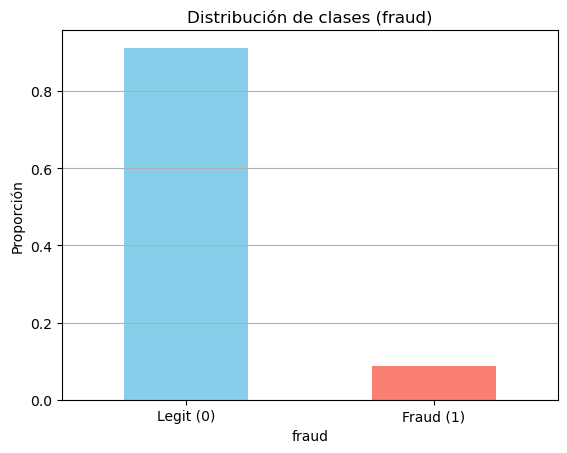

fraud
0.0    912597
1.0     87403
Name: count, dtype: int64


In [3]:
# Distribution of the target variable
fraud['fraud'].value_counts(normalize=True).plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Distribución de clases (fraud)")
plt.xticks(ticks=[0, 1], labels=['Legit (0)', 'Fraud (1)'], rotation=0)
plt.ylabel("Proporción")
plt.grid(axis='y')
plt.show()

# See exact count
print(fraud['fraud'].value_counts())

In [5]:
# Step 2: Train Logistic Regression with original data

# Separate features and target
X = fraud.drop('fraud', axis=1)
y = fraud['fraud']


# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)


# Assessment
y_pred = log_reg.predict(X_test)
print("📊 [Original data - Logistic Regression]")
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1]))

📊 [Original data - Logistic Regression]
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    182519
         1.0       0.90      0.60      0.72     17481

    accuracy                           0.96    200000
   macro avg       0.93      0.80      0.85    200000
weighted avg       0.96      0.96      0.96    200000

ROC AUC: 0.9670414404752562


In [6]:
# Step 3: Oversampling (RandomOverSampler)

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Train again
log_reg_ros = LogisticRegression(max_iter=1000)
log_reg_ros.fit(X_resampled, y_resampled)

# Assessment
y_pred_ros = log_reg_ros.predict(X_test)
print("📊 [Oversampling - Logistic Regression]")
print(classification_report(y_test, y_pred_ros))
print("ROC AUC:", roc_auc_score(y_test, log_reg_ros.predict_proba(X_test)[:, 1]))

📊 [Oversampling - Logistic Regression]
              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    182519
         1.0       0.58      0.95      0.72     17481

    accuracy                           0.93    200000
   macro avg       0.79      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000

ROC AUC: 0.9795274284454258


In [7]:
# Step 4: Undersampling (RandomUnderSampler)

rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_train, y_train)

log_reg_rus = LogisticRegression(max_iter=1000)
log_reg_rus.fit(X_rus, y_rus)

y_pred_rus = log_reg_rus.predict(X_test)
print("📊 [Undersampling - Logistic Regression]")
print(classification_report(y_test, y_pred_rus))
print("ROC AUC:", roc_auc_score(y_test, log_reg_rus.predict_proba(X_test)[:, 1]))

📊 [Undersampling - Logistic Regression]
              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    182519
         1.0       0.58      0.95      0.72     17481

    accuracy                           0.93    200000
   macro avg       0.79      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000

ROC AUC: 0.97957836189192


In [8]:
# Step 5: SMOTE (Synthetic Minority Over-sampling Technique)
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

log_reg_smote = LogisticRegression(max_iter=1000)
log_reg_smote.fit(X_smote, y_smote)

y_pred_smote = log_reg_smote.predict(X_test)
print("📊 [SMOTE - Logistic Regression]")
print(classification_report(y_test, y_pred_smote))
print("ROC AUC:", roc_auc_score(y_test, log_reg_smote.predict_proba(X_test)[:, 1]))

📊 [SMOTE - Logistic Regression]
              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    182519
         1.0       0.58      0.95      0.72     17481

    accuracy                           0.94    200000
   macro avg       0.79      0.94      0.84    200000
weighted avg       0.96      0.94      0.94    200000

ROC AUC: 0.9791796001660608


In [9]:
results = {
    "Original": roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1]),
    "Oversample": roc_auc_score(y_test, log_reg_ros.predict_proba(X_test)[:, 1]),
    "Undersample": roc_auc_score(y_test, log_reg_rus.predict_proba(X_test)[:, 1]),
    "SMOTE": roc_auc_score(y_test, log_reg_smote.predict_proba(X_test)[:, 1])
}

for method, auc in results.items():
    print(f"{method}: ROC AUC = {auc:.4f}")

Original: ROC AUC = 0.9670
Oversample: ROC AUC = 0.9795
Undersample: ROC AUC = 0.9796
SMOTE: ROC AUC = 0.9792
